In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import time
import torch
import numpy as np
from tqdm import tqdm

from datetime import datetime

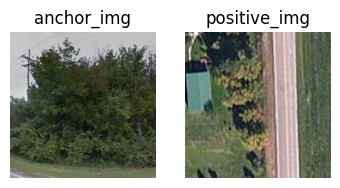

In [45]:
from CVUSA_dataset import CVUSA_dataset_cropped, CVUSA_Dataset_Eval
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset




transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
])


# data_path = '/media/fahimul/2B721C03261BDC8D/Research/datasets/CVUSA' #don't include the / at the end
# data_path = '/home/fa947945/datasets/CVUSA_Cropped/CVUSA' #don't include the / at the end
data_path = '/data/Research/Dataset/CVUSA_Cropped/CVUSA' #don't include the / at the end

train_data= pd.read_csv(f'{data_path}/splits/train-19zl.csv')
train_ds = CVUSA_dataset_cropped(df = train_data, path=data_path, transform=transform)

anchor_img, positive_img, negative_img = train_ds[0]

anchor_img = anchor_img.permute(1, 2, 0)
positive_img = positive_img.permute(1, 2, 0)
negative_img = negative_img.permute(1, 2, 0)

# plt.imshow(anchor_img.numpy())

# plt.imshow(positive_img.numpy())


# train_loader = DataLoader(train_ds, batch_size=32, shuffle=False)




plt.subplot(1, 3, 1)
plt.imshow(anchor_img)
plt.title('anchor_img')
plt.axis('off')

# Plotting the second image
plt.subplot(1, 3, 2)
plt.imshow(positive_img)
plt.title('positive_img')
plt.axis('off')

# Plotting the third image
# plt.subplot(1, 3, 3)
# plt.imshow(negative_img)
# plt.title('negative_img')
# plt.axis('off')

plt.show()


In [4]:
a = torch.rand(1, 128, 96, 96)
b = torch.rand(1, 128, 96, 96)
# b = torch.rand(1, 256, 48, 48)
c = torch.rand(1, 512, 24, 24)
d = torch.rand(1, 1024, 12, 12)

query_features = list([a,b])

reference_features = list([a,b,c,d])

for i in query_features:
    print(i.shape)

torch.Size([1, 128, 96, 96])
torch.Size([1, 128, 96, 96])


In [11]:
import torch
from torchvision.models import resnet50, ResNet50_Weights, vit_b_16, ViT_B_16_Weights
from torchsummary import summary
from models.clip_b32 import getClipModel
import torch.optim as optim
from losses import SoftTripletBiLoss
from custom_models import ResNet, VIT, CLIP_model


img1 = torch.rand(124, 3, 224, 224).cuda()
img2 = torch.rand(124, 3, 224, 224).cuda()



# from resnet_model import ResNet

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Device: {device}")
# model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
crit = SoftTripletBiLoss()
model1 = CLIP_model()
model2 = getClipModel()
# para1 = list(filter(lambda p: p.requires_grad, model1.parameters()))
# para2 = list(filter(lambda p: p.requires_grad, model1.parameters()))
# para = para1.append(para2)
# opti = optim.SGD(para, lr=0.001)
# emb1 = model1.encode_image(img1)
# emb2 = model2.encode_image(img2)
# for param in model1.parameters():
#     param.requires_grad = False


# for name, param in model1.named_parameters():
#     if param.requires_grad:
#         print(name, param.data)




print(model2.encode_image.ln_final)





<bound method CLIP.encode_image of CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.models import vision_transformer
from torchvision.models import resnet50, ResNet50_Weights, vit_b_16, ViT_B_16_Weights


# Load pre-trained ViT model
pretrained_vit = model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)


# Freeze the parameters of the pre-trained ViT model
for param in pretrained_vit.parameters():
    param.requires_grad = False

# Define the number of output classes
num_classes = 10  # CIFAR-10 has 10 classes

# Define a custom classifier with an extra hidden layer
class CustomClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Extract the input size of the pre-trained ViT model
# input_size = pretrained_vit.head.in_features

# Define the size of the hidden layer
# hidden_size = 512

# Create an instance of the custom classifier
# classifier = CustomClassifier(input_size, hidden_size, num_classes)

# Combine the pre-trained ViT model with the custom classifier
# model = nn.Sequential(pretrained_vit, classifier)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ViT input size
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

print(model)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:    # Print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')


In [ ]:
import math

dt = datetime.now()
f"{math.floor(dt.timestamp())}"[4:]

'701749'

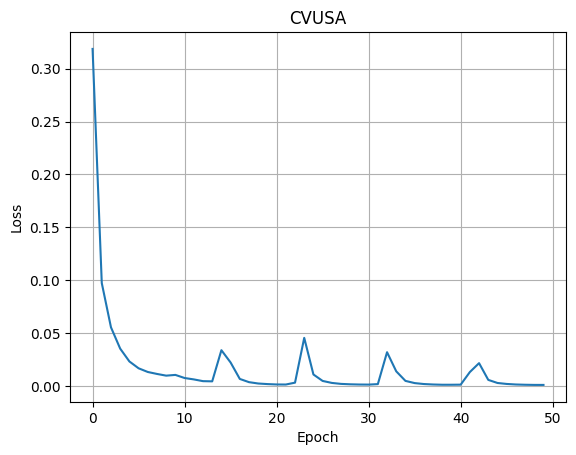

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/data/Research/CVGL_Baseline/losses/losses_3588734.csv')

# Assuming the first column is x-axis and the second column is y-axis
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# Plotting
plt.plot(x, y)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CVUSA' )
plt.grid(True)
plt.show()


In [53]:
a = torch.rand(128, 1000)
b = torch.rand(128, 1000)


# a_norm = np.sqrt(np.sum(a**2, axis=1, keepdims=True))

a_norm = np.sqrt(np.sum((a**2).numpy(), axis=1, keepdims=True))
b_norm = np.sqrt(np.sum((b**2).numpy(), axis=1, keepdims=True))

sim = np.matmul(a/a_norm, (b/b_norm).T)

eyes_ = torch.eye(5).cuda()
print(eyes_)
pos_mask = eyes_.eq(0.5)
pos_mask

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]], device='cuda:0')


tensor([[False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]], device='cuda:0')

In [184]:
import torch
import clip
n=5
m=10
inputs_q = torch.randn(n,m).cuda()
inputs_k = torch.randn(n,m).cuda()



n = inputs_q.size(0)

normalized_inputs_q = inputs_q / torch.norm(inputs_q, dim=1, keepdim=True)
normalized_inputs_k = inputs_k / torch.norm(inputs_k, dim=1, keepdim=True)
# normalized_inputs_q = inputs_q
# normalized_inputs_k = inputs_k
# print(normalized_inputs_q)
# print(normalized_inputs_k)


# # Compute similarity matrix
# sim_mat = torch.matmul(normalized_inputs_q, normalized_inputs_k.t())

# print(sim_mat)

sim_mat = normalized_inputs_q @ normalized_inputs_k.T

print(sim_mat)

# split the positive and negative pairs
eyes_ = torch.eye(n).cuda()

pos_mask = eyes_.eq(1)
neg_mask = ~pos_mask


pos_sim = torch.masked_select(sim_mat, pos_mask)
neg_sim = torch.masked_select(sim_mat, neg_mask)

# Contrastive loss of the example values
# temp parameter
t = 0.07
# concatenated vector divided by the temp parameter
for i in range(n):
    row = sim_mat[i]/t
    pos = row[i]

    exp = torch.exp(row)

    loss = -torch.log(pos/torch.sum(exp))
    print(loss)
    # #e^x of the values
    # exp = np.exp(logits)
    # # we only need to take the log of the positive value over the sum of exp. 
    # loss = - np.log(exp[0]/np.sum(exp))






# loss_batch = torch.log(1 + torch.exp((neg_sim_ - pos_sim_) * self.alpha))
# if torch.isnan(loss_batch).any():
#     print(inputs_q, inputs_k)
#     raise Exception

# loss = loss_batch.mean()

# mean_pos_sim = pos_sim.mean().item()
# mean_neg_sim = neg_sim.mean().item()
# loss, mean_pos_sim, mean_neg_sim


tensor([[-0.1622, -0.0031,  0.0897, -0.1908, -0.0965],
        [-0.3476, -0.5216,  0.0321, -0.1378,  0.3020],
        [ 0.1385, -0.1186, -0.3070,  0.2385,  0.3322],
        [ 0.2125,  0.4866, -0.2513,  0.5037, -0.1173],
        [-0.1394,  0.4188,  0.1371,  0.1847, -0.1681]], device='cuda:0')
tensor(nan, device='cuda:0')
tensor(nan, device='cuda:0')
tensor(nan, device='cuda:0')
tensor(6.8095, device='cuda:0')
tensor(nan, device='cuda:0')


In [101]:
triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2, eps=1e-7)
anchor = torch.randn(100, 128, requires_grad=True)
positive = torch.randn(100, 128, requires_grad=True)
negative = torch.randn(100, 128, requires_grad=True)
output = triplet_loss(anchor, positive, negative)
output.backward()

/home/fahimul/anaconda3/lib/python3.11/site-packages/torch/autograd/__init__.py:251: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [94]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
fet = []

# image = preprocess(Image.open("CLIP.jpg")).unsqueeze(0).to(device)
for i in range(5):
    image = torch.rand(64, 3, 224, 224)
    image = preprocess(image).unsqueeze(0).to(device)
    # text = clip.tokenize(["a diagram", "a dog", "a stallion"]).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)
        fet.append(image)
        # text_features = model.encode_text(text)
    
#     logits_per_image, logits_per_text = model(image, text)
#     probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]


AttributeError: 'Tensor' object has no attribute 'convert'

64